**You are free to consult any source online, for syntax or conceptual understanding or for any other help you need but please write your own code**

In Problem 2, don't worry if your results are bad or so, we are mainly looking at your approach to handle a new problem. Just put in your best effort and you will be fine, if you are using google colab, convert that into notebook and then submit it

# Problem 1( 30 Points )

Till now in the course, we have looked at Pytorch for doing deep learning. However, it is important to know how neural networks are implemented from scratch because it helps a lot in doing debugging and it increases your fundamental understanding

In this problem, you will implement a very simple three layer neural network with Input $x$, $W_1, W_2, W_3$ be the weights and $b_1, b_2, b_3$ be the biases and $y$ be the output.


![Image](https://drive.google.com/uc?id=1TW85VcYzDNwTTWDKEOR1fSEAIw3Rtw5V)

We will work with BodyFat Data. Use 150 examples for training and the remainder  for  testing  with  mean  squared  error.  Activation  functions are rectified linear unit (ReLU) 

You have to do the following:-

a) Implement the forward pass <br>
b) Implement the backward pass <br>
c) Submit code and report on mean square error on training and testing data

# Notes:-

1) seed : np.random.seed(0) <br>
2) Initialize weights following a standard normal distribution <br>
3) Initialize biases with zeros <br>
3) First layer 64 hidden units, second layer 16 hidden units <br>
4) **Use vectorized code** <br>
5) Use gradient descent for training and use reasonable stopping criteria for termination, such as stop when loss doesn't decrease much, use your judgement <br>
6) Learning rate: 1e-7 <br>

You can read the mat file using scipy functionality:-

# Part 1 #

*The discussion of the results is at the bottom of he code*

In [190]:
import scipy.io as sio
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import numpy as np

bodyfat = sio.loadmat('bodyfat_data.mat')
X = bodyfat['X']
Y = bodyfat['y']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=98,shuffle=True)
X_train = torch.tensor(torch.from_numpy(X_train).float(),dtype=torch.float64)
X_test = torch.tensor(torch.from_numpy(X_test).float(),dtype=torch.float64)
Y_train = torch.tensor(torch.from_numpy(Y_train).float(),dtype=torch.float64)
Y_test = torch.tensor(torch.from_numpy(Y_test).float(),dtype=torch.float64)

/var/folders/bv/j678dvtd34bc5mtymgsd2c6w0000gn/T/ipykernel_43857/2156593710.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(torch.from_numpy(X_train).float(),dtype=torch.float64)
/var/folders/bv/j678dvtd34bc5mtymgsd2c6w0000gn/T/ipykernel_43857/2156593710.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(torch.from_numpy(X_test).float(),dtype=torch.float64)
/var/folders/bv/j678dvtd34bc5mtymgsd2c6w0000gn/T/ipykernel_43857/2156593710.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_t

In [386]:
class ScratchNeuralNet(nn.Module):
    def __init__(self,inputSize, hiddenOne, hiddenTwo, outputSize):
        super().__init__()
        self.inputSize = inputSize
        self.hiddenOne = hiddenOne
        self.hiddenTwo = hiddenTwo
        self.outputSize = outputSize
        
        torch.manual_seed(0)
        
        self.W1 = torch.normal(mean=torch.zeros(self.inputSize,self.hiddenOne),std=1/150*torch.ones(self.inputSize,self.hiddenOne)).double().requires_grad_()
        self.b1 = torch.zeros(1,self.hiddenOne).double().requires_grad_()
        
        self.W2 = torch.normal(mean=torch.zeros(self.hiddenOne,self.hiddenTwo),std=1/150*torch.ones(self.hiddenOne, self.hiddenTwo)).double().requires_grad_()
        self.b2 = torch.zeros(1,self.hiddenTwo).double().requires_grad_()
        
        self.W3 = torch.normal(mean=torch.zeros(self.hiddenTwo,self.outputSize),std=1/150*torch.ones(self.hiddenTwo,self.outputSize)).double().requires_grad_()
        self.b3 = torch.zeros(1,self.outputSize).double().requires_grad_()
        
        self.relu = nn.ReLU()
        
    def forward(self,X):
        a1 = torch.mm(X,self.W1) + self.b1
        z1 = self.relu(a1)
        
        a2 = torch.mm(z1,self.W2) + self.b2
        z2 = self.relu(a2)
        
        yhat = torch.mm(z2,self.W3) + self.b3
        return yhat
    
    def cost(self, yhat, y):
        AveMSE = torch.mean( (y-yhat)**2 ) 
        return AveMSE
   
    def zero_grads(self):
        with torch.no_grad():
            self.W1.grad.zero_()
            self.W2.grad.zero_()
            self.W3.grad.zero_()
            self.b1.grad.zero_()
            self.b2.grad.zero_()
            self.b3.grad.zero_()

    def updateParams(self, lr):
        with torch.no_grad():
            self.W1 -= lr*self.W1.grad
            self.W2 -= lr*self.W2.grad
            self.W3 -= lr*self.W3.grad
            self.b1 -= lr*self.b1.grad
            self.b2 -= lr*self.b2.grad
            self.b3 -= lr*self.b3.grad
        
    
    def backward(self,yhat,y):
        loss = self.cost(yhat,y)
        loss.backward()
        self.updateParams(0.0001)
        self.zero_grads()
        
        
        
        
        
        

In [404]:
model = ScratchNeuralNet(2,64,16,1)
epochs = 80

for epoch in range(epochs):
    yhat = model(X_train)
    model.backward(yhat,Y_train)
    print("Epoch:"," ", epoch, "Loss:", model.cost(yhat,Y_train))


yhatTest = model(X_test)
model.backward(yhatTest, Y_test)
print("\nTest:"," ", epoch, "Loss:", model.cost(yhatTest,Y_test))
    
    

Epoch:   0 Loss: tensor(432.4668, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   1 Loss: tensor(432.3133, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   2 Loss: tensor(432.1598, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   3 Loss: tensor(432.0061, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   4 Loss: tensor(431.8524, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   5 Loss: tensor(431.6986, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   6 Loss: tensor(431.5446, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   7 Loss: tensor(431.3905, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   8 Loss: tensor(431.2363, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   9 Loss: tensor(431.0818, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   10 Loss: tensor(430.9271, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   11 Loss: tensor(430.7722, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch:   12 Loss: tensor(430.6170, dty

## Discussion

# Problem 2( 70 Points )

__Part 1 (Monthly Factor Data)__: Download the 5- factor Fama french factors monthly factors dataset from the below link:-
    
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

Once you download the data, you will find that it contains a mix of annual and monthly factors and some texts at the top, so pd.read_csv will error out( try taking a look at csv file in text editor ). To get the monthly data, you can do the following:-

df = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', skiprows = 3).iloc[:-59,:]

Use data from 1970-2010 as training data, 2010-2015 as validation data, 2015-2020 as a testing data. 

As you have seen from other courses, Factor models are heavily used in asset pricing as well as predicting future stock returns. For future stock return prediction, we typically have a seperate model for factor loadings. By factor loadings, we mean that coefficents of factor in the model. At time $t$ and by taking the dot product of 1) best estimation of factor loading for next time interval($t+1$) and 2) best estimate of factors at next time interval ($t+1$), one can come up with an estimation of future single stock return and create a long/short portfolio of stocks (long the stock with positive return prediction and short the ones that have negative predicted returns). However, most of these predictive models simply use the current value of the factors as the best guess for the factor value as time $t+1$. An alternative choice is using moving average of factor values as an estimate for the value of the factor at next time step.

In this question, you are asked to analyze whether using a time series model (RNN/GRU/LSTM) would be able to give us better estimate for the value of the future factors values. To be more concrete, you need to try some recurrent neural networks and  use past values of the factors as input and the value of the factors at next time interval as the target. You can try different design for the network and its inputs, for example:

- The input is 1-dimensional (the future value of each factor depends only on its own past).
- The imput is 5-dimensional (the future value of each factor depends on history of all factors).

You can either train 5 different neural networks to predict each of the 5 factors, or use one neural network to predict 5 factors at once

Use data from 1970-2010 as training data, 2010-2015 as validation data, 2015-2020 as a testing data. You should tune the parameters using validation set only. After you have tuned the hyperparameters, use the model to make predictions on testing data and report the accuracy and performance of model. Compare the performance of the model with the two benchmarks mentioned above (last known value or moving average of previous values). Choose the window size for moving average as you desire

__Part 2__ As you might have learnt from past courses, all these 5 factors are tradable portfolios by construction (for example SMB factor is a tradable portfolio loging small Caps and shorting Big Caps). Using the predictive model of previous step, design a trading strategy (for example, long the factor with highest estimated return and short the factor with smallest estimated return, or any other strategy of your choice). Calculate total return, sharpe ratio for the out of sample period.

To be more precise, you can choose a starting cash amount such as 100,000 dollars, and see the performance of your trading strategy on this amount

Suppose the factor predicted at time step is $F_{t+1}$, you can calculate the percentage return as $\frac{F_{t+1} - F_{t}}{F_{t}}$. You can similarly calculate the return of true factors in testing data

To be more precise, if the return vector of factors after prediction from neural network is $[0.1, 0.05, 0.07, 0.08, -0.09]$, then we will long the first factor and short the fifth factor. If the return vector of factors our testing dataset is $[0.02, 0.08, 0.54, 0.09, 0.05]$, then our PNL will be  $100,000*(-0.02 + 0.05)$ which is equal to $3000$

You can sum this PNL across various time steps by calculating and that will give you the performace of trading strategy on entire testing data( out of sample data)

As you can see, since the factors are tradables itself, we don't need to worry about factor loadings in calculating the PnL. You can experiment with any trading strategy of your choice based on these factors


__Part 3__  Repeat the previous two steps by woking on daily factor data (you can download it from the same url) and perform a comparison between the two approaches

When use download daily data, you will also find that it contains text in the beginning. Just set the parameter skiprows to 3 in pd.read_csv, and it will work fine and then you can proceed along similar lines

Feel free to use your judgement on this problem and make assumptions anywhere you get stuck, just mention that in the notebook. The design of the problem is made open-ended intentionally

__Feel free to use google colab for Keras or Pytorch.__<br>
__Don't forget to use a lot of regularization to minimize the risk of overfitting__

In [1109]:
import pandas as pd
df = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', skiprows = 3).iloc[:-59,:]

In [1110]:
index1 = df[df["Unnamed: 0"]=="197001"].index[0]
index2 = df[df["Unnamed: 0"]=="200912"].index[0]
index3 = df[df["Unnamed: 0"]=="201512"].index[0]
index4 = df[df["Unnamed: 0"]=="202012"].index[0]

trainFeatures = df[["SMB","HML","RMW","CMA","RF"]].loc[index1:index2]
validationFeatures = df[["SMB","HML","RMW","CMA","RF"]].loc[index2+1:index3]
testFeatures = df[["SMB","HML","RMW","CMA","RF"]].loc[index3+1:index4]

In [1111]:
def load_data(df, look_back):
    data_raw = df.values # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(data_raw.shape[0] - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data)
    
    x_train = data[:,:-1,:] #first (lookback - 1) elements
    y_train = data[:,-1,:] #last element which is to be predicted based on x_train

    return x_train, y_train

look_back = 3 # sequence length
x_train, y_train = load_data(trainFeatures, look_back)
x_val, y_val = load_data(validationFeatures, look_back)
x_test, y_test = load_data(testFeatures, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)

x_train.shape =  (477, 2, 5)
y_train.shape =  (477, 5)


In [1112]:
x_train = torch.from_numpy(np.asfarray(x_train)).type(torch.Tensor)
x_test = torch.from_numpy(np.asfarray(x_test)).type(torch.Tensor)
x_val = torch.from_numpy(np.asfarray(x_val)).type(torch.Tensor)
y_train = torch.from_numpy(np.asfarray(y_train)).type(torch.Tensor)
y_test = torch.from_numpy(np.asfarray(y_test)).type(torch.Tensor)
y_val = torch.from_numpy(np.asfarray(y_val)).type(torch.Tensor)

In [1113]:
input_dim = 5 # there is only single value at each node
hidden_dim = 2
num_layers = 2 #one LSTM stacked on top of each other
output_dim = 5 #this is a regression problem now

# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        self.n_outputs = output_dim

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True,dropout = 0.5)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        self.batch_size = x.size(0)
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch

        out, _ = self.lstm(x, (h0.detach(), c0.detach()))

        final_out = self.fc(out[:,-1,:]) 
        final_out = final_out.view(-1,self.n_outputs)

        return final_out


In [1114]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

LSTM(
  (lstm): LSTM(5, 2, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=2, out_features=5, bias=True)
)


In [1115]:
num_epochs = 500
hist = np.zeros(num_epochs)
hist2 = np.zeros(num_epochs)
# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    
    # Forward pass
    y_train_pred = model(x_train)

    loss_val = loss(y_train_pred, y_train)

    if t % 100 == 0 and t !=0:
        print("\nEpoch ", t, "MSE: ", loss_val.item())
        print("Epoch ",t,"Val MSE: ",loss(model(x_val),y_val).item())

    hist[t] = loss_val.item()
    hist2[t] = loss(model(x_val),y_val).item()
    # Zero out gradient, else they will accumulate between epochs
    optimizer.zero_grad()

    # Backward pass
    loss_val.backward()

    # Update parameters
    optimizer.step()



Epoch  100 MSE:  5.94448709487915
Epoch  100 Val MSE:  2.670475721359253

Epoch  200 MSE:  5.874831199645996
Epoch  200 Val MSE:  2.6509244441986084

Epoch  300 MSE:  5.828480243682861
Epoch  300 Val MSE:  2.66176700592041

Epoch  400 MSE:  5.80929708480835
Epoch  400 Val MSE:  2.6757209300994873


[Text(0.5, 0, 'Number of Epochs'),
 Text(0, 0.5, 'Average Mean-Square Error'),
 Text(0.5, 1.0, 'Error vs. Num Epochs')]

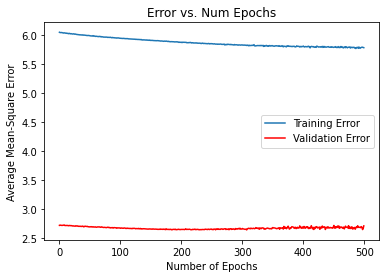

In [1116]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

hist = pd.DataFrame(hist)#
hist.rename(columns={0:"Training Error"},inplace=True)
hist2 = pd.DataFrame(hist2)
hist2.rename(columns={0:"Validation Error"},inplace = True)

fig = sns.lineplot(data = hist)
fig = sns.lineplot(data = hist2,palette=['r'])
fig.set(xlabel="Number of Epochs",ylabel="Average Mean-Square Error",title = "Error vs. Num Epochs")

I now consider my model fully optimized. my methods for regulating over fitting are setting the dropout probability to 50%. I also have reduced the number of hidden dimension to just 2 and the sequence length to 1. I am genuinely suprised by the model parameters, but the larger my model tended to get in any of these parameter, the more quickly I saw evidence of severe overfitting. Now I will compare this LSTM model to baseline methods

In [1117]:
print(f"\nThe model has loss of {loss(model(x_test),y_test).item()} over the TEST SET\n")


The model has loss of 5.2334394454956055 over the TEST SET



In [1118]:
lastVal = x_test[:,-1,:]
lastSeqPredictionLoss = loss(lastVal,y_test).item()
print(f'\nThe loss on the TEST SET from using the factors at time t as a proxy for the factors at time t+1 gives us an average MSE of {lastSeqPredictionLoss}\n')


The loss on the TEST SET from using the factors at time t as a proxy for the factors at time t+1 gives us an average MSE of 8.808276176452637



In [1128]:
temp_X_Test = np.array(x_test[:,0,:])
MALength = 5
MA = np.zeros((temp_X_Test.shape[0]-MALength,5))

for i in range(temp_X_Test.shape[0]-MALength):
    mySlice = temp_X_Test[i:i+MALength]
    MA[i,:] = np.average(mySlice,axis=0)

temp = torch.from_numpy(MA)
MAPredLoss = loss(temp,y_test[MALength:]).item()
print(f'\nThe loss on the TEST SET from using a moving average over the last 5 periods as a proxy for the factors at time t+1 gives us an average MSE of {MAPredLoss}\n')


The loss on the TEST SET from using a moving average over the last 5 periods as a proxy for the factors at time t+1 gives us an average MSE of 6.325165668558522



Overall, we can see that our simple LSTM network has improved the performance quite considerably from both baseline methods. Given the simplicity of the model I believe this absolutely warrants the use of this model over the baseline methods.

 
 

I spent a considerable amount of time Tweaking the following to get my results:

Learning Rate: Adjusted much lower to reduce the instability of Error

Hidden Dimension: I realized that reducing the size of the hidden dimension greatly helped with reducing overfitting 

Num Epochs: I observed many different epoch sizes and found a suitable stopping time based off my architecture and learning rate

Sequence Size: The sequence size was reduced to 2. This seems odd, but I did not find the results that I wanted with larger sequence sizes

Dropout Rate: I used a dropout rate of the 50% which seems quite high, but lower values for dropout suggested that there was still considerable overfitting to address

# Part 2

I am going to try a long/short strategy for this section by following the recommended path above

In [1077]:
predictedFactors = model(x_test)
predictedReturns = ((predictedFactors - x_test[:,-1,:])/x_test[:,-1,:]).detach().numpy()
actualReturns = ((y_test - x_test[:,-1,:])/x_test[:,-1,:]).detach().numpy()
actualReturns[np.ma.masked_invalid(actualReturns).mask] = 0

In [1078]:
strategy = np.zeros(predictedReturns.shape)
strategy[np.max(predictedReturns,axis=1).reshape(strategy.shape[0],1)==predictedReturns] = 1
strategy[np.min(predictedReturns,axis=1).reshape(strategy.shape[0],1)==predictedReturns] = -1

In [1079]:
Returns = actualReturns*strategy
Returns = np.sum(Returns,axis=1).reshape(Returns.shape[0],1)

In [1080]:
CashAmount = 100000
Returns[np.ma.masked_invalid(Returns).mask] = 0

In [1163]:
PNL = np.sum(Returns*CashAmount)
print(f"The Total PNL sums up to be: ${PNL}")

The Total PNL sums up to be: $-825525.3905430436


We can see that the returns are not a particularly great way to create a strategy. This is actually because calculated returns for values that move around zero produce highly unstable results.

As a second way to evaluate this, let us consider buying 10,000 shares for the factor that has the greatest difference from t to t+1 and we can short 10,000 shares that has the most negative difference from t to t+1

In [1164]:
predictedFactors = model(x_test)
predictedDiff = ((predictedFactors - x_test[:,-1,:])).detach().numpy()
actualDiff = ((y_test - x_test[:,-1,:])).detach().numpy()

In [1165]:
strategy = np.zeros(predictedDiff.shape)
strategy[np.max(predictedDiff,axis=1).reshape(strategy.shape[0],1)==predictedDiff] = 1
strategy[np.min(predictedDiff,axis=1).reshape(strategy.shape[0],1)==predictedDiff] = -1

In [1166]:
Diff1 = actualDiff*strategy
Diff = np.sum(Diff1,axis=1).reshape(Diff1.shape[0],1)

In [1177]:
totalNumberShares = 10000
PNL = Diff*totalNumberShares
print(f'The total gain over the test set for buying 10,000 shares of the factor with the biggest expected difference and shorting 10,000 shares with the smallest expected difference is ${np.sum(PNL)}')

The total gain over the test set for buying 10,000 shares of the factor with the biggest expected difference and shorting 10,000 shares with the smallest expected difference is $2150899.988543242


We can see that this is a much better strategy given the values that the Fama/French factors take on. It shows that we can reliably predict the direction of movement in the Fama/French factors and that we can implement a profitable strategy with this knowledge. Given that the maximum value of the Fama/French factors in the test set is about 8.2, we can expect that our strategy will never cost us more than $82,000 in one month

Also note that because I have decided to look at the differences as apposed to the returns (For reasons stated above), I cannot calculated the sharpe ratio. This is primarily because my initial capital requirements are sometimes negative, thus suggesting that I require no capital for some month to month trades. 

# Part 3

In [1208]:
import pandas as pd
df = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.csv', skiprows = 3).iloc[:-59,:]

In [1209]:
index1 = df[df["Unnamed: 0"]==19700102].index[0]
index2 = df[df["Unnamed: 0"]==20091231].index[0]
index3 = df[df["Unnamed: 0"]==20151231].index[0]
index4 = df[df["Unnamed: 0"]==20201231].index[0]

trainFeatures = df[["SMB","HML","RMW","CMA","RF"]].loc[index1:index2]
validationFeatures = df[["SMB","HML","RMW","CMA","RF"]].loc[index2+1:index3]
testFeatures = df[["SMB","HML","RMW","CMA","RF"]].loc[index3+1:index4]

In [1216]:
def load_data(df, look_back):
    data_raw = df.values # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(data_raw.shape[0] - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data)
    
    x_train = data[:,:-1,:] #first (lookback - 1) elements
    y_train = data[:,-1,:] #last element which is to be predicted based on x_train

    return x_train, y_train

look_back = 30 # sequence length
x_train, y_train = load_data(trainFeatures, look_back)
x_val, y_val = load_data(validationFeatures, look_back)
x_test, y_test = load_data(testFeatures, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)

x_train.shape =  (10067, 29, 5)
y_train.shape =  (10067, 5)


In [1217]:
x_train = torch.from_numpy(np.asfarray(x_train)).type(torch.Tensor)
x_test = torch.from_numpy(np.asfarray(x_test)).type(torch.Tensor)
x_val = torch.from_numpy(np.asfarray(x_val)).type(torch.Tensor)
y_train = torch.from_numpy(np.asfarray(y_train)).type(torch.Tensor)
y_test = torch.from_numpy(np.asfarray(y_test)).type(torch.Tensor)
y_val = torch.from_numpy(np.asfarray(y_val)).type(torch.Tensor)

In [1259]:
input_dim = 5 # there is only single value at each node
hidden_dim = 5
num_layers = 2 #one LSTM stacked on top of each other
output_dim = 5 #this is a regression problem now

# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        self.n_outputs = output_dim

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True,dropout = 0.1)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        self.batch_size = x.size(0)
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch

        out, _ = self.lstm(x, (h0.detach(), c0.detach()))

        final_out = self.fc(out[:,-1,:]) 
        final_out = final_out.view(-1,self.n_outputs)

        return final_out


In [1294]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
print(model)

LSTM(
  (lstm): LSTM(5, 5, num_layers=2, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=5, out_features=5, bias=True)
)


In [1295]:
num_epochs = 55
hist = np.zeros(num_epochs)
hist2 = np.zeros(num_epochs)
# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    
    # Forward pass
    y_train_pred = model(x_train)

    loss_val = loss(y_train_pred, y_train)

    if t % 20 == 0 and t !=0:
        print("\nEpoch ", t, "MSE: ", loss_val.item())
        print("Epoch ",t,"Val MSE: ",loss(model(x_val),y_val).item())

    hist[t] = loss_val.item()
    hist2[t] = loss(model(x_val),y_val).item()
    # Zero out gradient, else they will accumulate between epochs
    optimizer.zero_grad()

    # Backward pass
    loss_val.backward()

    # Update parameters
    optimizer.step()



Epoch  20 MSE:  0.19090870022773743
Epoch  20 Val MSE:  0.1500094085931778

Epoch  40 MSE:  0.17739947140216827
Epoch  40 Val MSE:  0.13609562814235687


[Text(0.5, 0, 'Number of Epochs'),
 Text(0, 0.5, 'Average Mean-Square Error'),
 Text(0.5, 1.0, 'Error vs. Num Epochs')]

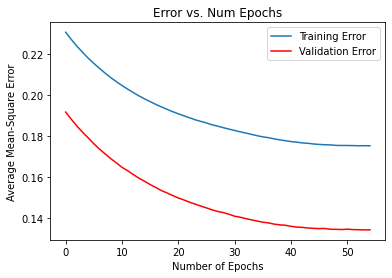

In [1296]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

hist = pd.DataFrame(hist)#
hist.rename(columns={0:"Training Error"},inplace=True)
hist2 = pd.DataFrame(hist2)
hist2.rename(columns={0:"Validation Error"},inplace = True)

fig = sns.lineplot(data = hist)
fig = sns.lineplot(data = hist2,palette=['r'])
fig.set(xlabel="Number of Epochs",ylabel="Average Mean-Square Error",title = "Error vs. Num Epochs")

After optimizing the parameters for this new neural network on daily data I am going to test this model on the test set now.

In [1297]:
print(f"\nThe model has loss of {loss(model(x_test),y_test).item()} over the TEST SET\n")


The model has loss of 0.3057524263858795 over the TEST SET



In [1223]:
lastVal = x_test[:,-1,:]
lastSeqPredictionLoss = loss(lastVal,y_test).item()
print(f'\nThe loss on the TEST SET from using the factors at time t as a proxy for the factors at time t+1 gives us an average MSE of {lastSeqPredictionLoss}\n')


The loss on the TEST SET from using the factors at time t as a proxy for the factors at time t+1 gives us an average MSE of 0.5822740197181702



In [1234]:
temp_X_Test = np.array(x_test[:,0,:])
MALength = 30
MA = np.zeros((temp_X_Test.shape[0]-MALength,5))

for i in range(temp_X_Test.shape[0]-MALength):
    mySlice = temp_X_Test[i:i+MALength]
    MA[i,:] = np.average(mySlice,axis=0)

temp = torch.from_numpy(MA)
MAPredLoss = loss(temp,y_test[MALength:]).item()
print(f'\nThe loss on the TEST SET from using a moving average over the last 5 periods as a proxy for the factors at time t+1 gives us an average MSE of {MAPredLoss}\n')


The loss on the TEST SET from using a moving average over the last 5 periods as a proxy for the factors at time t+1 gives us an average MSE of 0.31237014009948866



When we compare the trained model to both baseline cases we can see that we have managed to improve the Mean-Square Error. I will discuss the differences between the neural net from part 2 and the neural net from this part below. Before we do that, notice that the moving averge is set to 30 (representing an entire months worth of previous values). The moving average as a predictor actually does a fairly decent job compared to the model. I am suprised by the little improvement that the model has over this baseline method.

The main differences between this model and the previous model are the following:

Learning Rate: The learning rate was increased from 0.01 to 0.03

Number of Epochs: The number of epoch was finely tuned down to only 55, which is much less than before

Sequence Length: The sequence length was adjusted to take in the previous 30 days worth of information (representing the previous month factor values)

Hidden Dimension: The hidden dimension was increased from 2 to 5

Dropout Rate: The dropout rate was decreased from 0.5 to 0.1 in this model

### Summary

Overall, I noticed that no matter what hyperparameters I changed I had trouble reducing the training and validation error below the current levels they are at. This was really interesting to observe. It seemed to be indicating a plateau in about the same region. I also noticed that it was much more difficult to overfit this data. I still managed to do it by cranking up the hyperparameter values to fairly large levels, but this model was MUCH more forgiving compared to model trained on monthly factors.